In [4]:
%load_ext memory_profiler
import autograd.numpy as anp
from qoc import grape_schroedinger_discrete
from qoc.standard import (TargetStateInfidelity,
                          conjugate_transpose,
                          get_annihilation_operator,
                          get_creation_operator,
                          SIGMA_Z,
                          generate_save_file_path, )
from memory_profiler import profile
import numpy as np

from qutip import (qsave,qload)
import matplotlib.pyplot as plt


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [5]:


# Define the system.
def get_memory_manually(N,l):
    """
    0_transmon_pi.py - This module demonstrates
    a simple example of grape on the schroedinger equation
    using time discrete control parameters to evolve a transmon qubit
    form the ground state to the first excited state.
    """


    HILBERT_SIZE = l
    ANNIHILATION_OPERATOR = get_annihilation_operator(HILBERT_SIZE)
    CREATION_OPERATOR = get_creation_operator(HILBERT_SIZE)
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    sigmax = ANNIHILATION_OPERATOR + CREATION_OPERATOR
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    H_SYSTEM_0 = CREATION_OPERATOR*ANNIHILATION_OPERATOR
    # Only real control amplitutdes are supported!
    hamiltonian = lambda controls, time: (H_SYSTEM_0
                                          + controls[0] * sigmax)

    # Define the problem.
    CAVITY_VACUUM = anp.zeros((l, 1))
    CAVITY_ZERO = anp.copy(CAVITY_VACUUM)
    CAVITY_ZERO[0, 0] = 1
    CAVITY_ONE = anp.copy(CAVITY_VACUUM)
    CAVITY_ONE[1, 0] = 1
    CAVITY_VACUUM= anp.zeros((l, 1))

    INITIAL_STATE_0=anp.copy(CAVITY_VACUUM)
    INITIAL_STATE_0[0,0]=1
    TARGET_STATE_0 = anp.copy(CAVITY_VACUUM)
    TARGET_STATE_0[1,0]=1
    INITIAL_STATES = anp.stack((INITIAL_STATE_0,), axis=0)
    TARGET_STATES = anp.stack((TARGET_STATE_0,), axis=0)
    COSTS = [TargetStateInfidelity(TARGET_STATES)]

    # Define the optimization.
    COMPLEX_CONTROLS = False
    CONTROL_COUNT = 1
    EVOLUTION_TIME = 10  # nanoseconds
    CONTROL_EVAL_COUNT = SYSTEM_EVAL_COUNT = N + 1
    ITERATION_COUNT = 1

    # Define output.
    LOG_ITERATION_STEP = 1
    SAVE_ITERATION_STEP = 1
    SAVE_PATH = "./out"
    SAVE_FILE_NAME = "transmon_pi"
    SAVE_FILE_PATH = generate_save_file_path(SAVE_FILE_NAME, SAVE_PATH)
    CONTROL_HAMILTONIAN = [sigmax]

    manual_parameter = {"control_hamiltonian": CONTROL_HAMILTONIAN, "manual_gradient_mode": True,'Hk_approximation':False}

    def main():
        result = grape_schroedinger_discrete(CONTROL_COUNT, CONTROL_EVAL_COUNT,
                                             COSTS, EVOLUTION_TIME, hamiltonian,
                                             INITIAL_STATES, SYSTEM_EVAL_COUNT,
                                             complex_controls=COMPLEX_CONTROLS,
                                             iteration_count=ITERATION_COUNT,
                                             log_iteration_step=LOG_ITERATION_STEP,
                                             manual_parameter=manual_parameter
                                             )
    if __name__ == "__main__":
        main()


# Define the system.
def get_memory(N,l):
    """
    0_transmon_pi.py - This module demonstrates
    a simple example of grape on the schroedinger equation
    using time discrete control parameters to evolve a transmon qubit
    form the ground state to the first excited state.
    """


    HILBERT_SIZE = l
    ANNIHILATION_OPERATOR = get_annihilation_operator(HILBERT_SIZE)
    CREATION_OPERATOR = get_creation_operator(HILBERT_SIZE)
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    sigmax = ANNIHILATION_OPERATOR + CREATION_OPERATOR
    # E.q. 19 (p. 6) of https://arxiv.org/abs/1904.06560.
    H_SYSTEM_0 = CREATION_OPERATOR*ANNIHILATION_OPERATOR
    # Only real control amplitutdes are supported!
    hamiltonian = lambda controls, time: (H_SYSTEM_0
                                          + controls[0] * sigmax)

    # Define the problem.
    CAVITY_VACUUM = anp.zeros((l, 1))
    CAVITY_ZERO = anp.copy(CAVITY_VACUUM)
    CAVITY_ZERO[0, 0] = 1
    CAVITY_ONE = anp.copy(CAVITY_VACUUM)
    CAVITY_ONE[1, 0] = 1
    CAVITY_VACUUM= anp.zeros((l, 1))

    INITIAL_STATE_0=anp.copy(CAVITY_VACUUM)
    INITIAL_STATE_0[0,0]=1
    TARGET_STATE_0 = anp.copy(CAVITY_VACUUM)
    TARGET_STATE_0[1,0]=1
    INITIAL_STATES = anp.stack((INITIAL_STATE_0,), axis=0)
    TARGET_STATES = anp.stack((TARGET_STATE_0,), axis=0)
    COSTS = [TargetStateInfidelity(TARGET_STATES)]

    # Define the optimization.
    COMPLEX_CONTROLS = False
    CONTROL_COUNT = 1
    EVOLUTION_TIME = 10  # nanoseconds
    CONTROL_EVAL_COUNT = SYSTEM_EVAL_COUNT = N + 1
    ITERATION_COUNT = 1

    # Define output.
    LOG_ITERATION_STEP = 1
    SAVE_ITERATION_STEP = 1
    SAVE_PATH = "./out"
    SAVE_FILE_NAME = "transmon_pi"
    SAVE_FILE_PATH = generate_save_file_path(SAVE_FILE_NAME, SAVE_PATH)
    CONTROL_HAMILTONIAN = [sigmax]

    manual_parameter = {"control_hamiltonian": CONTROL_HAMILTONIAN, "manual_gradient_mode": True}

    def main():
        result = grape_schroedinger_discrete(CONTROL_COUNT, CONTROL_EVAL_COUNT,
                                             COSTS, EVOLUTION_TIME, hamiltonian,
                                             INITIAL_STATES, SYSTEM_EVAL_COUNT,
                                             complex_controls=COMPLEX_CONTROLS,
                                             iteration_count=ITERATION_COUNT,
                                             log_iteration_step=LOG_ITERATION_STEP,
                                             
                                             )
    if __name__ == "__main__":
        main()










In [11]:
N_=10
time_ad_10=[[],[]]
time_ma_10=[[],[]]
h_dims=[2200,2300,2400,2500]
for dim in h_dims:
    time_tep=%timeit -r3 -n10 -o get_memory(N_,dim)
    time_ad_10[0].append(time_tep.average)
    time_ad_10[1].append(time_tep.stdev)
    time_tep=%timeit -r3 -n10 -o get_memory_manually(N_,dim)
    time_ma_10[0].append(time_tep.average)
    time_ma_10[1].append(time_tep.stdev)

iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total

  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120

  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120

  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120

  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
15.6 s ± 248 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.9

  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.10286881e-15
21.6 s ± 224 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.92193718e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 8.9

In [8]:
N=[10,30,40,60,100,150]
time_ad_lfixed=[[],[]]
time_ma_lfixed=[[],[]]
l=500
for i in range(len(N)):
    time_tep=%timeit -r10 -n3 -o get_memory(N[i],l)
    time_ad_lfixed[0].append(time_tep.average)
    time_ad_lfixed[1].append(time_tep.stdev)
    time_tep=%timeit -r10 -n3 -o get_memory_manually(N[i],l)
    time_ma_lfixed[0].append(time_tep.average)
    time_ma_lfixed[1].append(time_tep.stdev)
    

iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.49620421e-15
iter   |   total

  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 2.39531360e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120

  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.73269749e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120

  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 3.48142298e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120

  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.53793241e-15
27.1 s ± 203 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 6.85994603e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 6.8

  0    | 6.32120559e-01 | 1.10784463e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.10784463e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.10784463e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.10784463e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 1.10784463e-15
40.5 s ± 330 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.72641220e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.72641220e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.72641220e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.72641220e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.72641220e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.72641220e-15
iter   |   total error  |    grads_l2   
  0    | 6.32120559e-01 | 4.7

In [14]:
def memory_plot_Nfixed(N,l,time_ad,time_ma):
    fig, ax = plt.subplots()
    x = (np.array(l))**2 
    y = np.array(time_ad[0]) 
    fit = np.polyfit(x,y,1)
    ang_coeff = fit[0]
    intercept = fit[1]
    fit_eq = ang_coeff*x + intercept  
    ax.errorbar(x, time_ad[0], yerr = time_ad[1],fmt='o',color='C0',label='Auto-grad average points')
    ax.plot(x, fit_eq,color='C0', alpha = 0.5, label = 'Auto-grad Linear fit')
    print('AD '+"slope is "+str(ang_coeff)+"and intercept is "+str(intercept))
    
    x = (np.array(l))**2 
    y = np.array(time_ma[0]) 
    fit = np.polyfit(x,y,1)
    ang_coeff = fit[0]
    intercept = fit[1]
    fit_eq = ang_coeff*x + intercept 
    ax.plot(x, fit_eq,color = 'C1', alpha = 0.5, label = 'Manual Linear fit')
    ax.errorbar(x, time_ma[0], yerr = time_ad[1],fmt='o',color='C1',label='Manual average points')
    print('Manual '+"slope is "+str(ang_coeff)+"and intercept is "+str(intercept))
    ax.legend()
    ax.set_ylabel ( "time per iteration/s")
    ax.set_xlabel ('Hilbert space dimension^2')
    ax.set_title('time step is '+str(N))
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    plt.savefig('time_haku_Nfixed')
    plt.show()
def memory_plot_lfixed(N,l,time_ad,time_ma):
    fig, ax = plt.subplots() 
    x = (np.array(N)) 
    y = np.array(time_ad[0]) 
    fit = np.polyfit(x,y,1)
    ang_coeff = fit[0]
    intercept = fit[1]
    fit_eq = ang_coeff*x + intercept
    ax.errorbar(x, time_ad[0], yerr = time_ad[1],fmt='o',color='C0',label='Auto-grad average points')
    ax.plot(x, fit_eq,color='C0', alpha = 0.5, label = 'Auto-grad Linear fit')
    print('AD '+"slope is "+str(ang_coeff)+"and intercept is "+str(intercept))
    
    x = (np.array(N)) 
    y = np.array(time_ma[0]) 
    fit = np.polyfit(x,y,1)
    ang_coeff = fit[0]
    intercept = fit[1]
    fit_eq = ang_coeff*x + intercept
    ax.errorbar(N, time_ma[0], yerr = time_ad[1],fmt='o',color='C1',label='Manual average points')
    ax.plot(x, fit_eq,color='C1', alpha = 0.5, label = 'Auto-grad Linear fit')
    print('Manual '+"slope is "+str(ang_coeff)+"and intercept is "+str(intercept))
    ax.set_ylabel ( "time per iteration/s")
    ax.set_xlabel ('Time step')
    ax.set_title('Hilbert space dimension is '+str(l))
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.legend()
    plt.savefig('time_haku_Nfixed')
    plt.show()

AD slope is 2.4649263977253756e-05and intercept is -3.9047363920779112
Manual slope is 2.059667151320111e-05and intercept is -2.7919600476046575


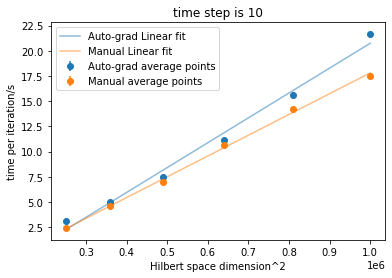

AD slope is 0.26849191442657533and intercept is 0.24884334313930492
Manual slope is 0.18669579567839995and intercept is 0.44545350287254165


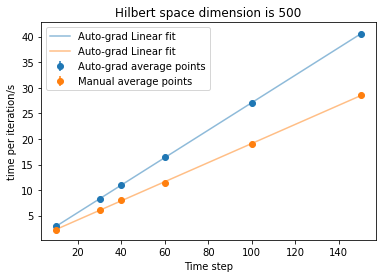

In [15]:
memory_plot_Nfixed(N_,h_dims,time_ad_10,time_ma_10)
memory_plot_lfixed(N,l,time_ad_lfixed,time_ma_lfixed)

In [17]:
qsave([N_,h_dims,time_ad_10,time_ma_10,N,l,time_ad_lfixed,time_ma_lfixed],'Haku_runtime')